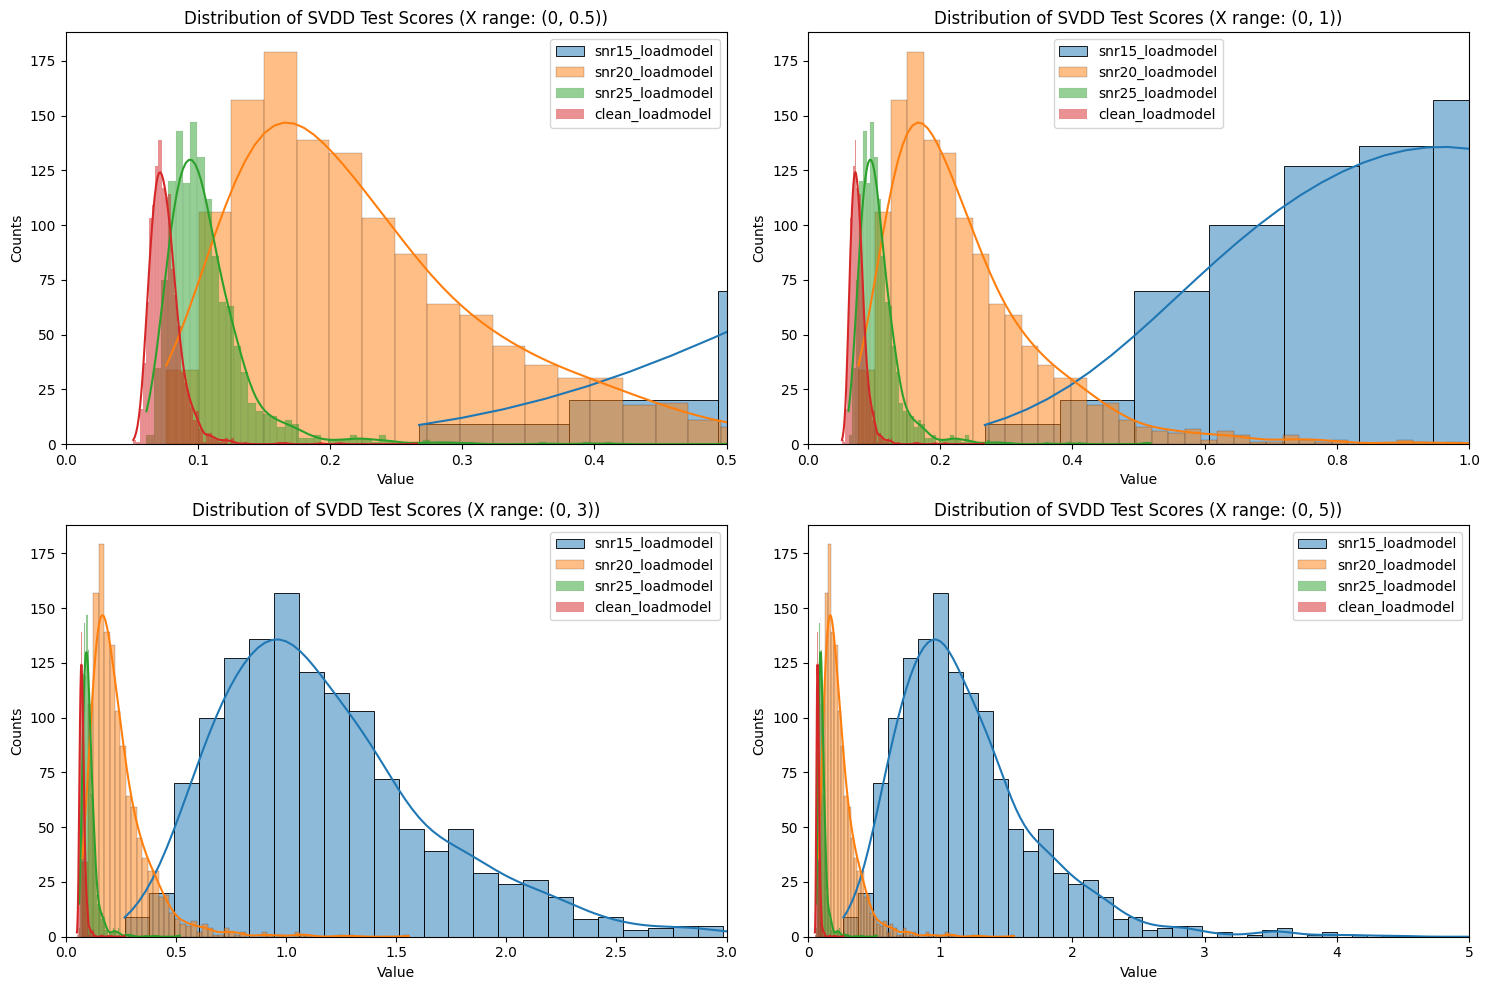

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

def process_json(json_file_path):
    with open(json_file_path, "r") as json_file:
        data = json.load(json_file)
    
    test_scores = data.get("test_scores", [])
    scores = [score for score, _ in test_scores]
    return scores

json_files = [
    ("./log/results_snr15_loadmodel.json", "snr15_loadmodel"),
    # ("./log/results_snr15.json", "snr15"),
    ("./log/results_snr20_loadmodel.json", "snr20_loadmodel"),
    # ("./log/results_snr20.json", "snr20"),
    ("./log/results_snr25_loadmodel.json", "snr25_loadmodel"),
    # ("./log/results_snr25.json", "snr25"),
    ("./log/results_clean_loadmodel.json", "clean_loadmodel"),
    # ("./log/results_clean.json", "clean"),
]

# Set x range
x_ranges = [(0, 0.5), (0, 1), (0, 3), (0, 5)]
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for x_range, ax in zip(x_ranges, axs.flat):
    ax.set_title(f"Distribution of SVDD Test Scores (X range: {x_range})")

    for json_path, name in json_files:
        scores = process_json(json_path)
        sns.histplot(scores, kde=True, label=name, alpha=0.5, ax=ax)  # Use alpha to adjust transparency

    ax.set_xlabel('SVDD Value')
    ax.set_ylabel('Counts')
    ax.set_xlim(x_range)
    ax.legend()

plt.tight_layout()
plt.show()